In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
from sklearn.utils import shuffle
X, y = boston.data, boston.target

In [7]:
X.shape

(506, 13)

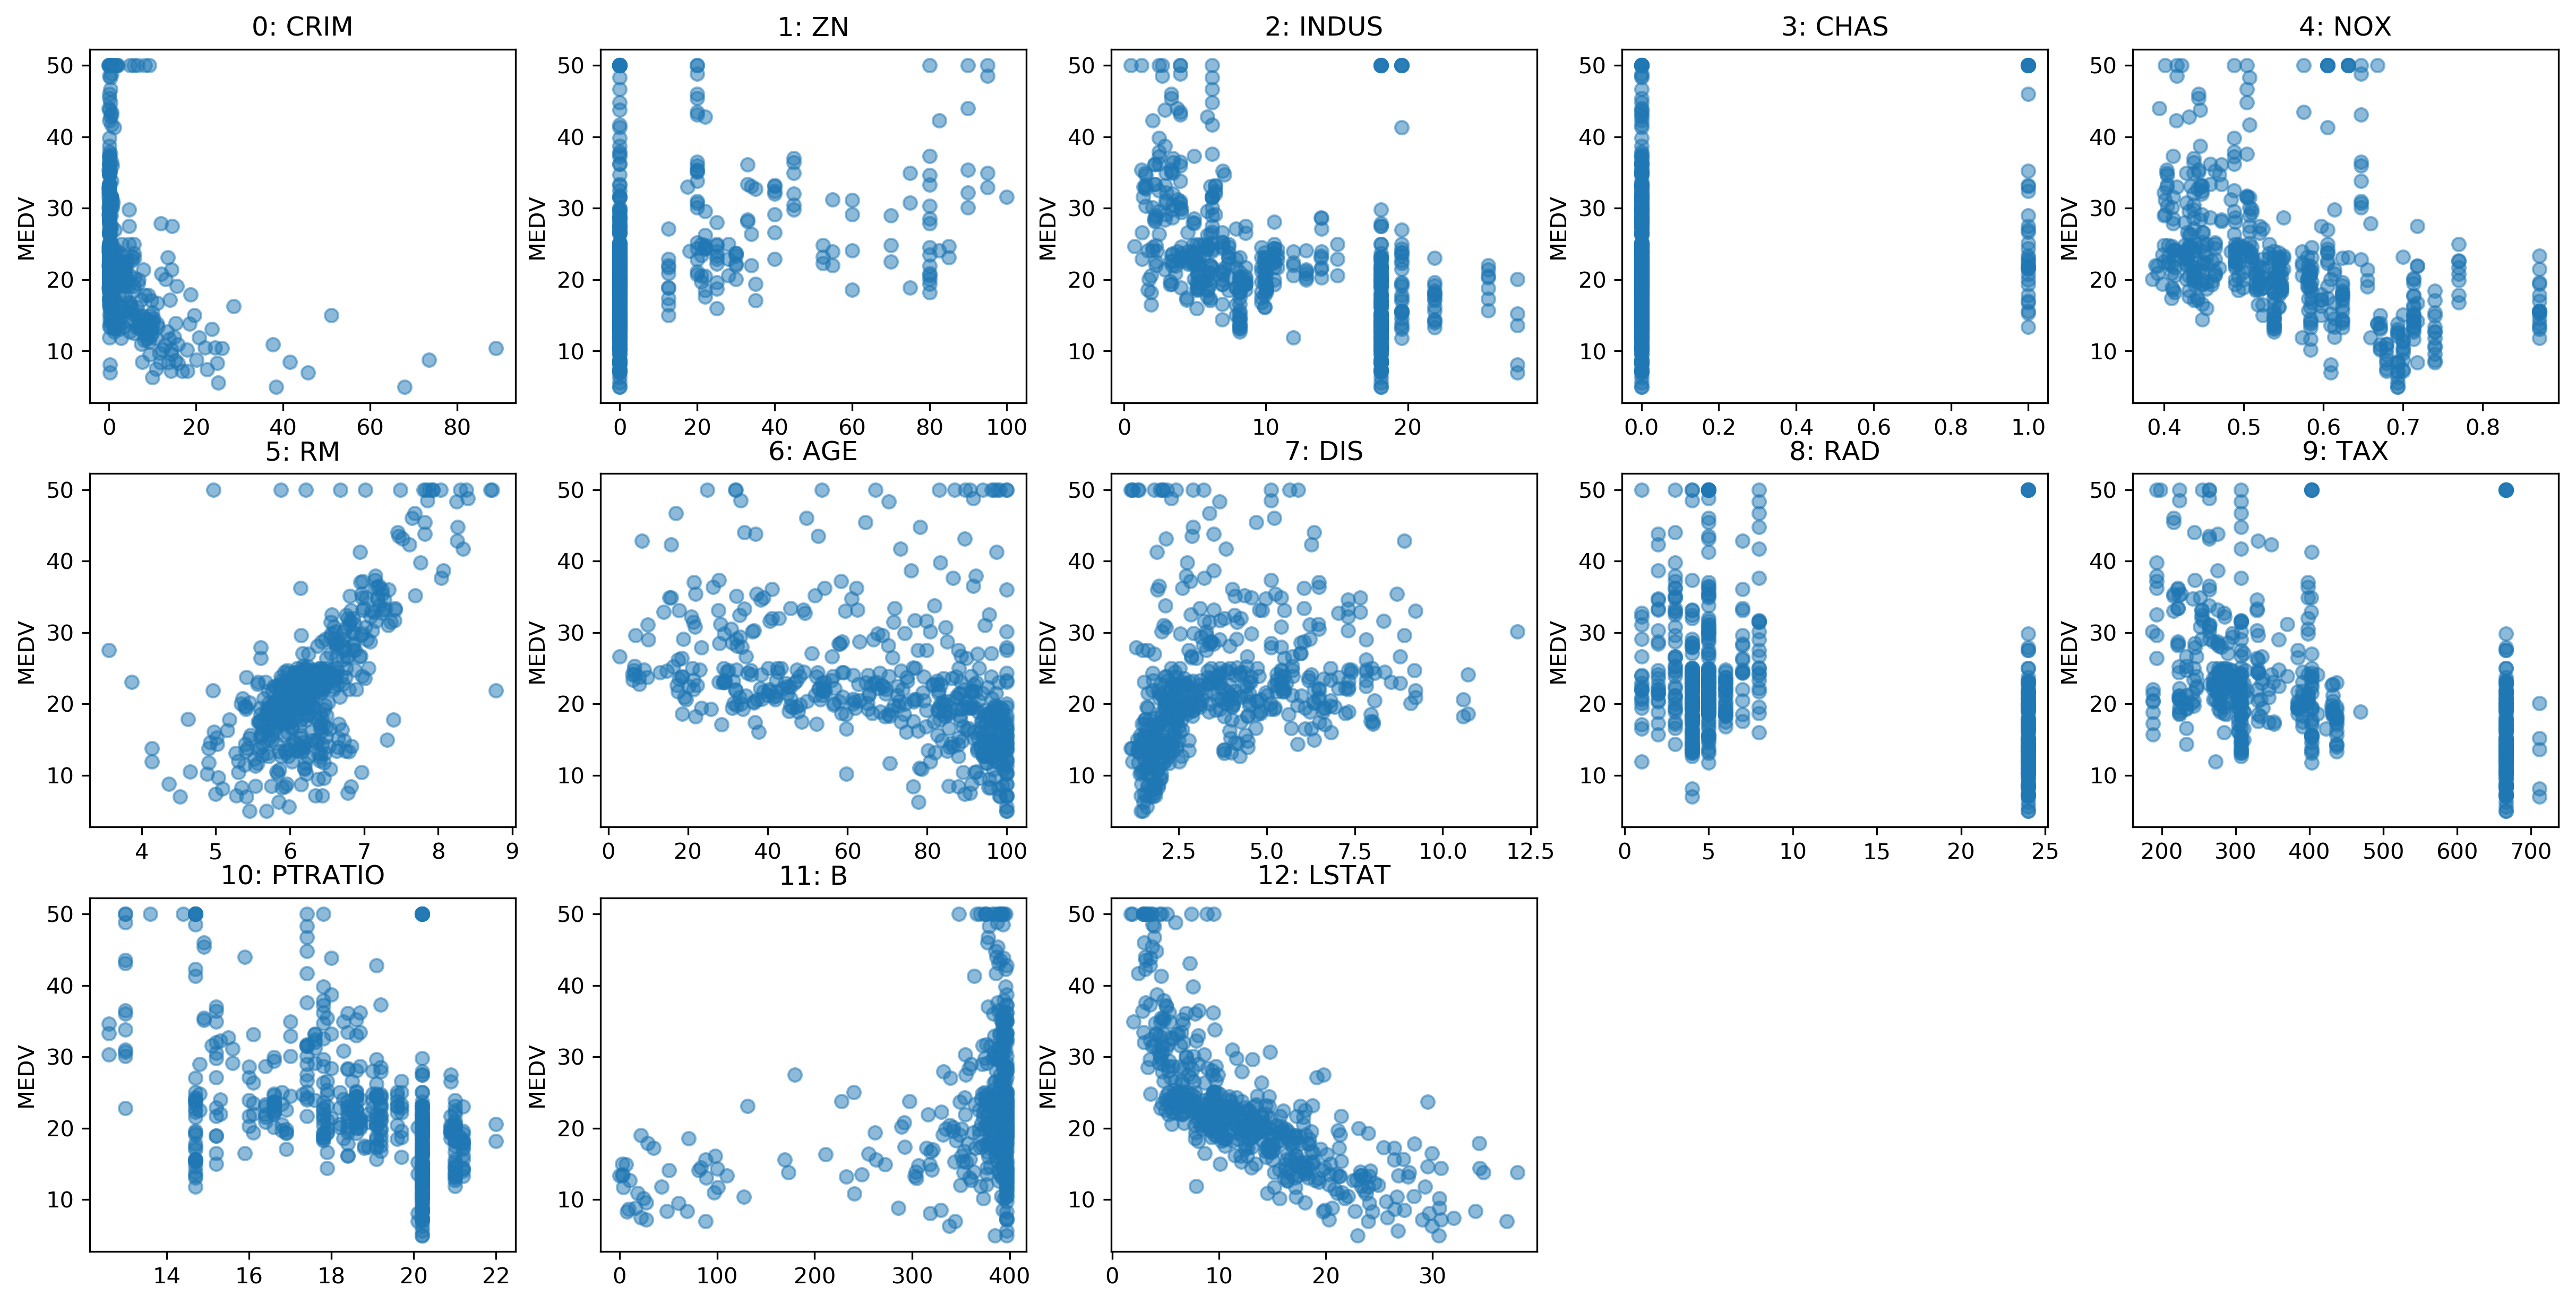

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [9]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648379

In [54]:
np.mean(cross_val_score(Ridge(alpha=0.1), X_train, y_train, cv=10))

0.7160600746856847

In [55]:
np.set_printoptions(suppress=True, precision=3)

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [57]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

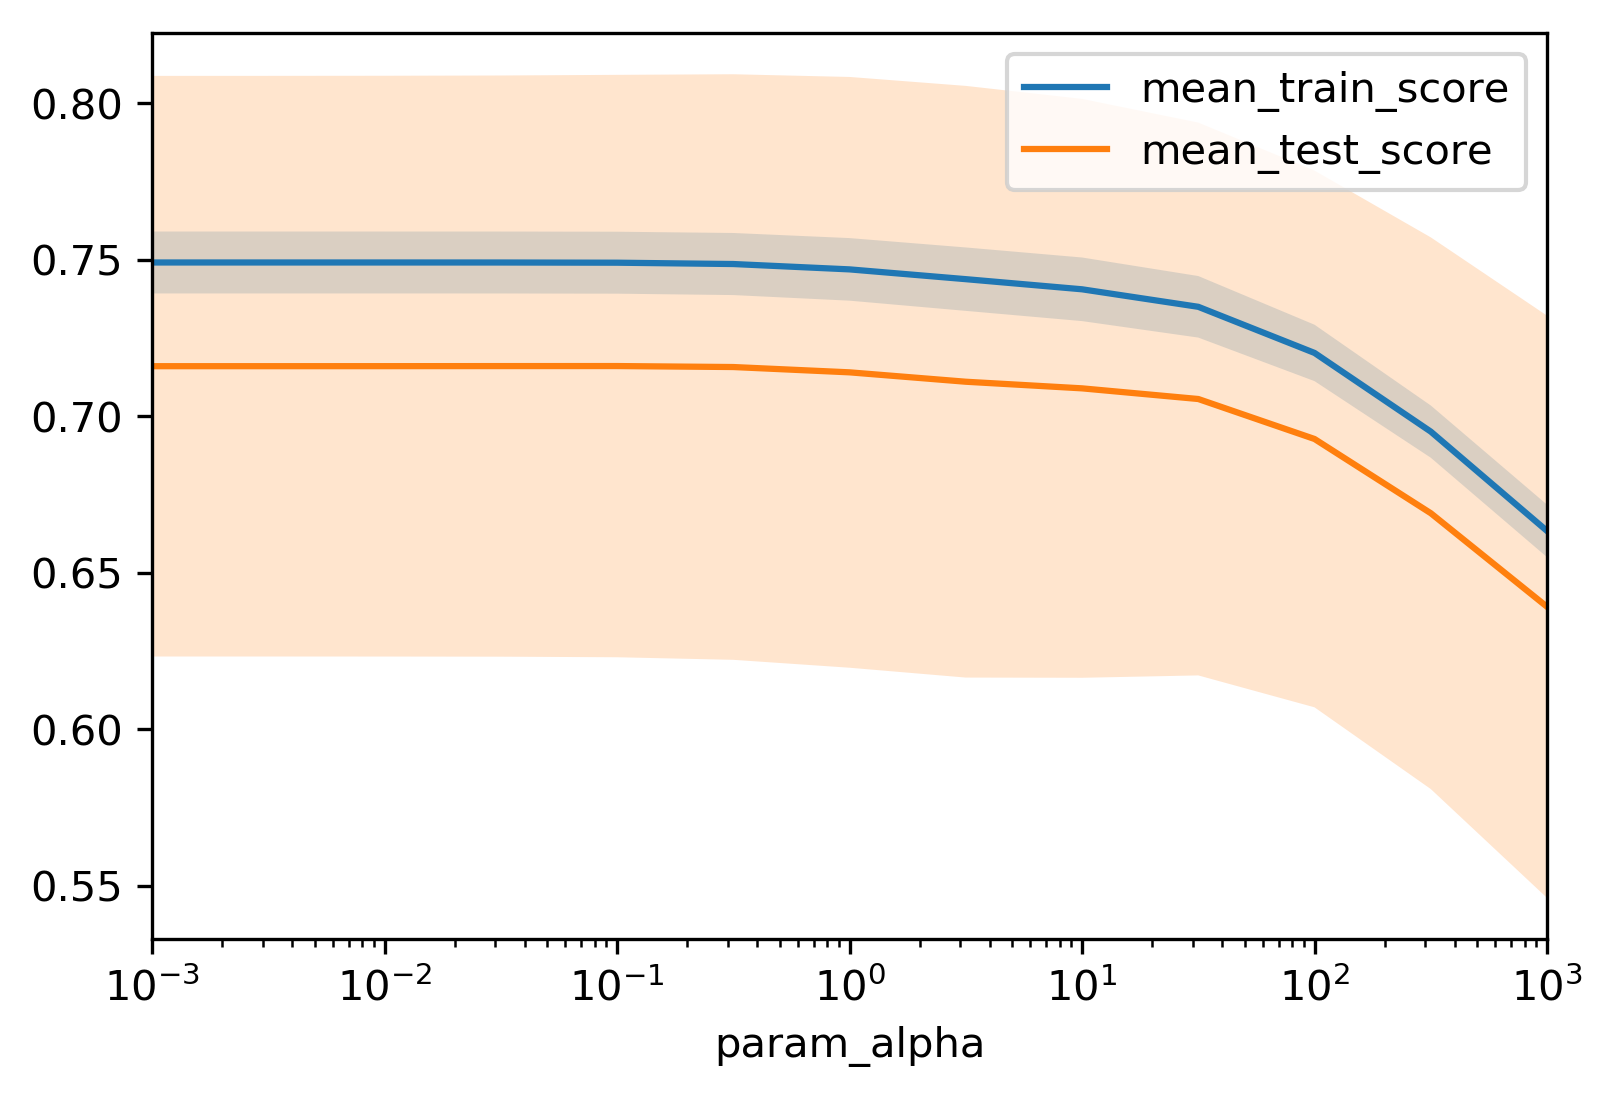

In [58]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [28]:
grid.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
grid.best_params_

{'alpha': 0.1}

In [17]:
grid.best_score_

0.7160600746856847

In [30]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [31]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.8078646451295277

In [32]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.8227099613418716

In [33]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

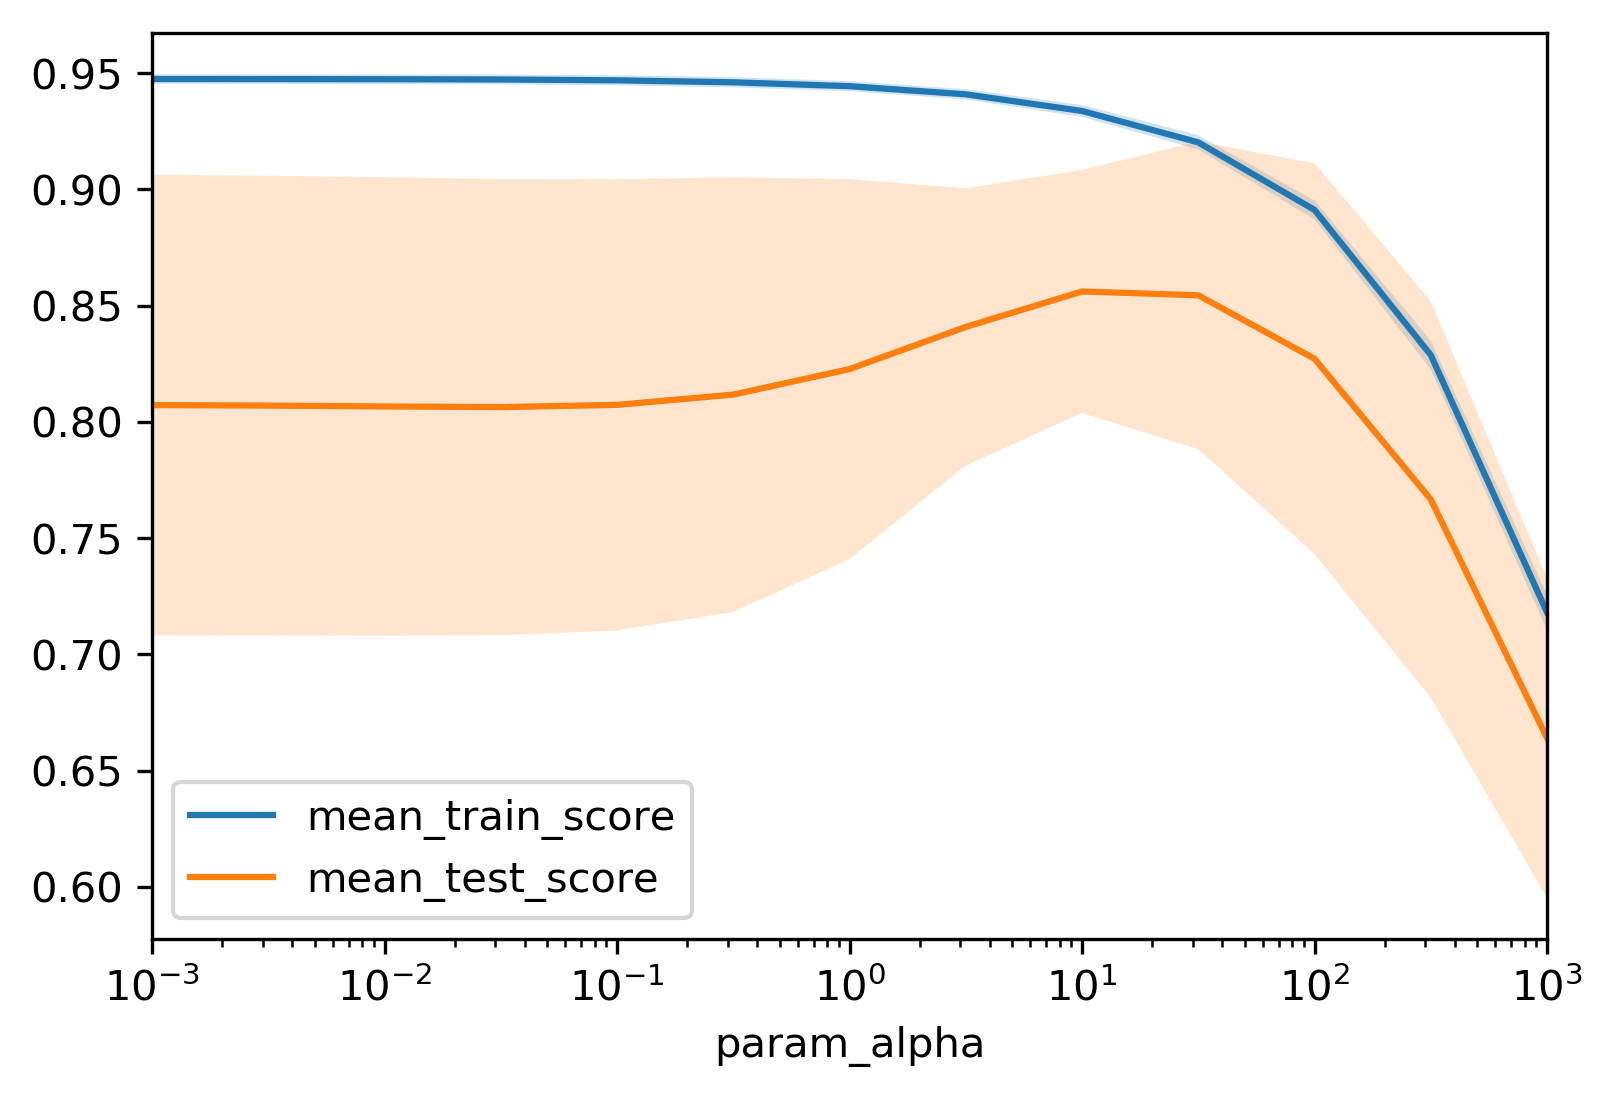

In [34]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
grid.score(X_test, y_test)

# Lasso + Ridge

<a list of 1 text.Text objects>

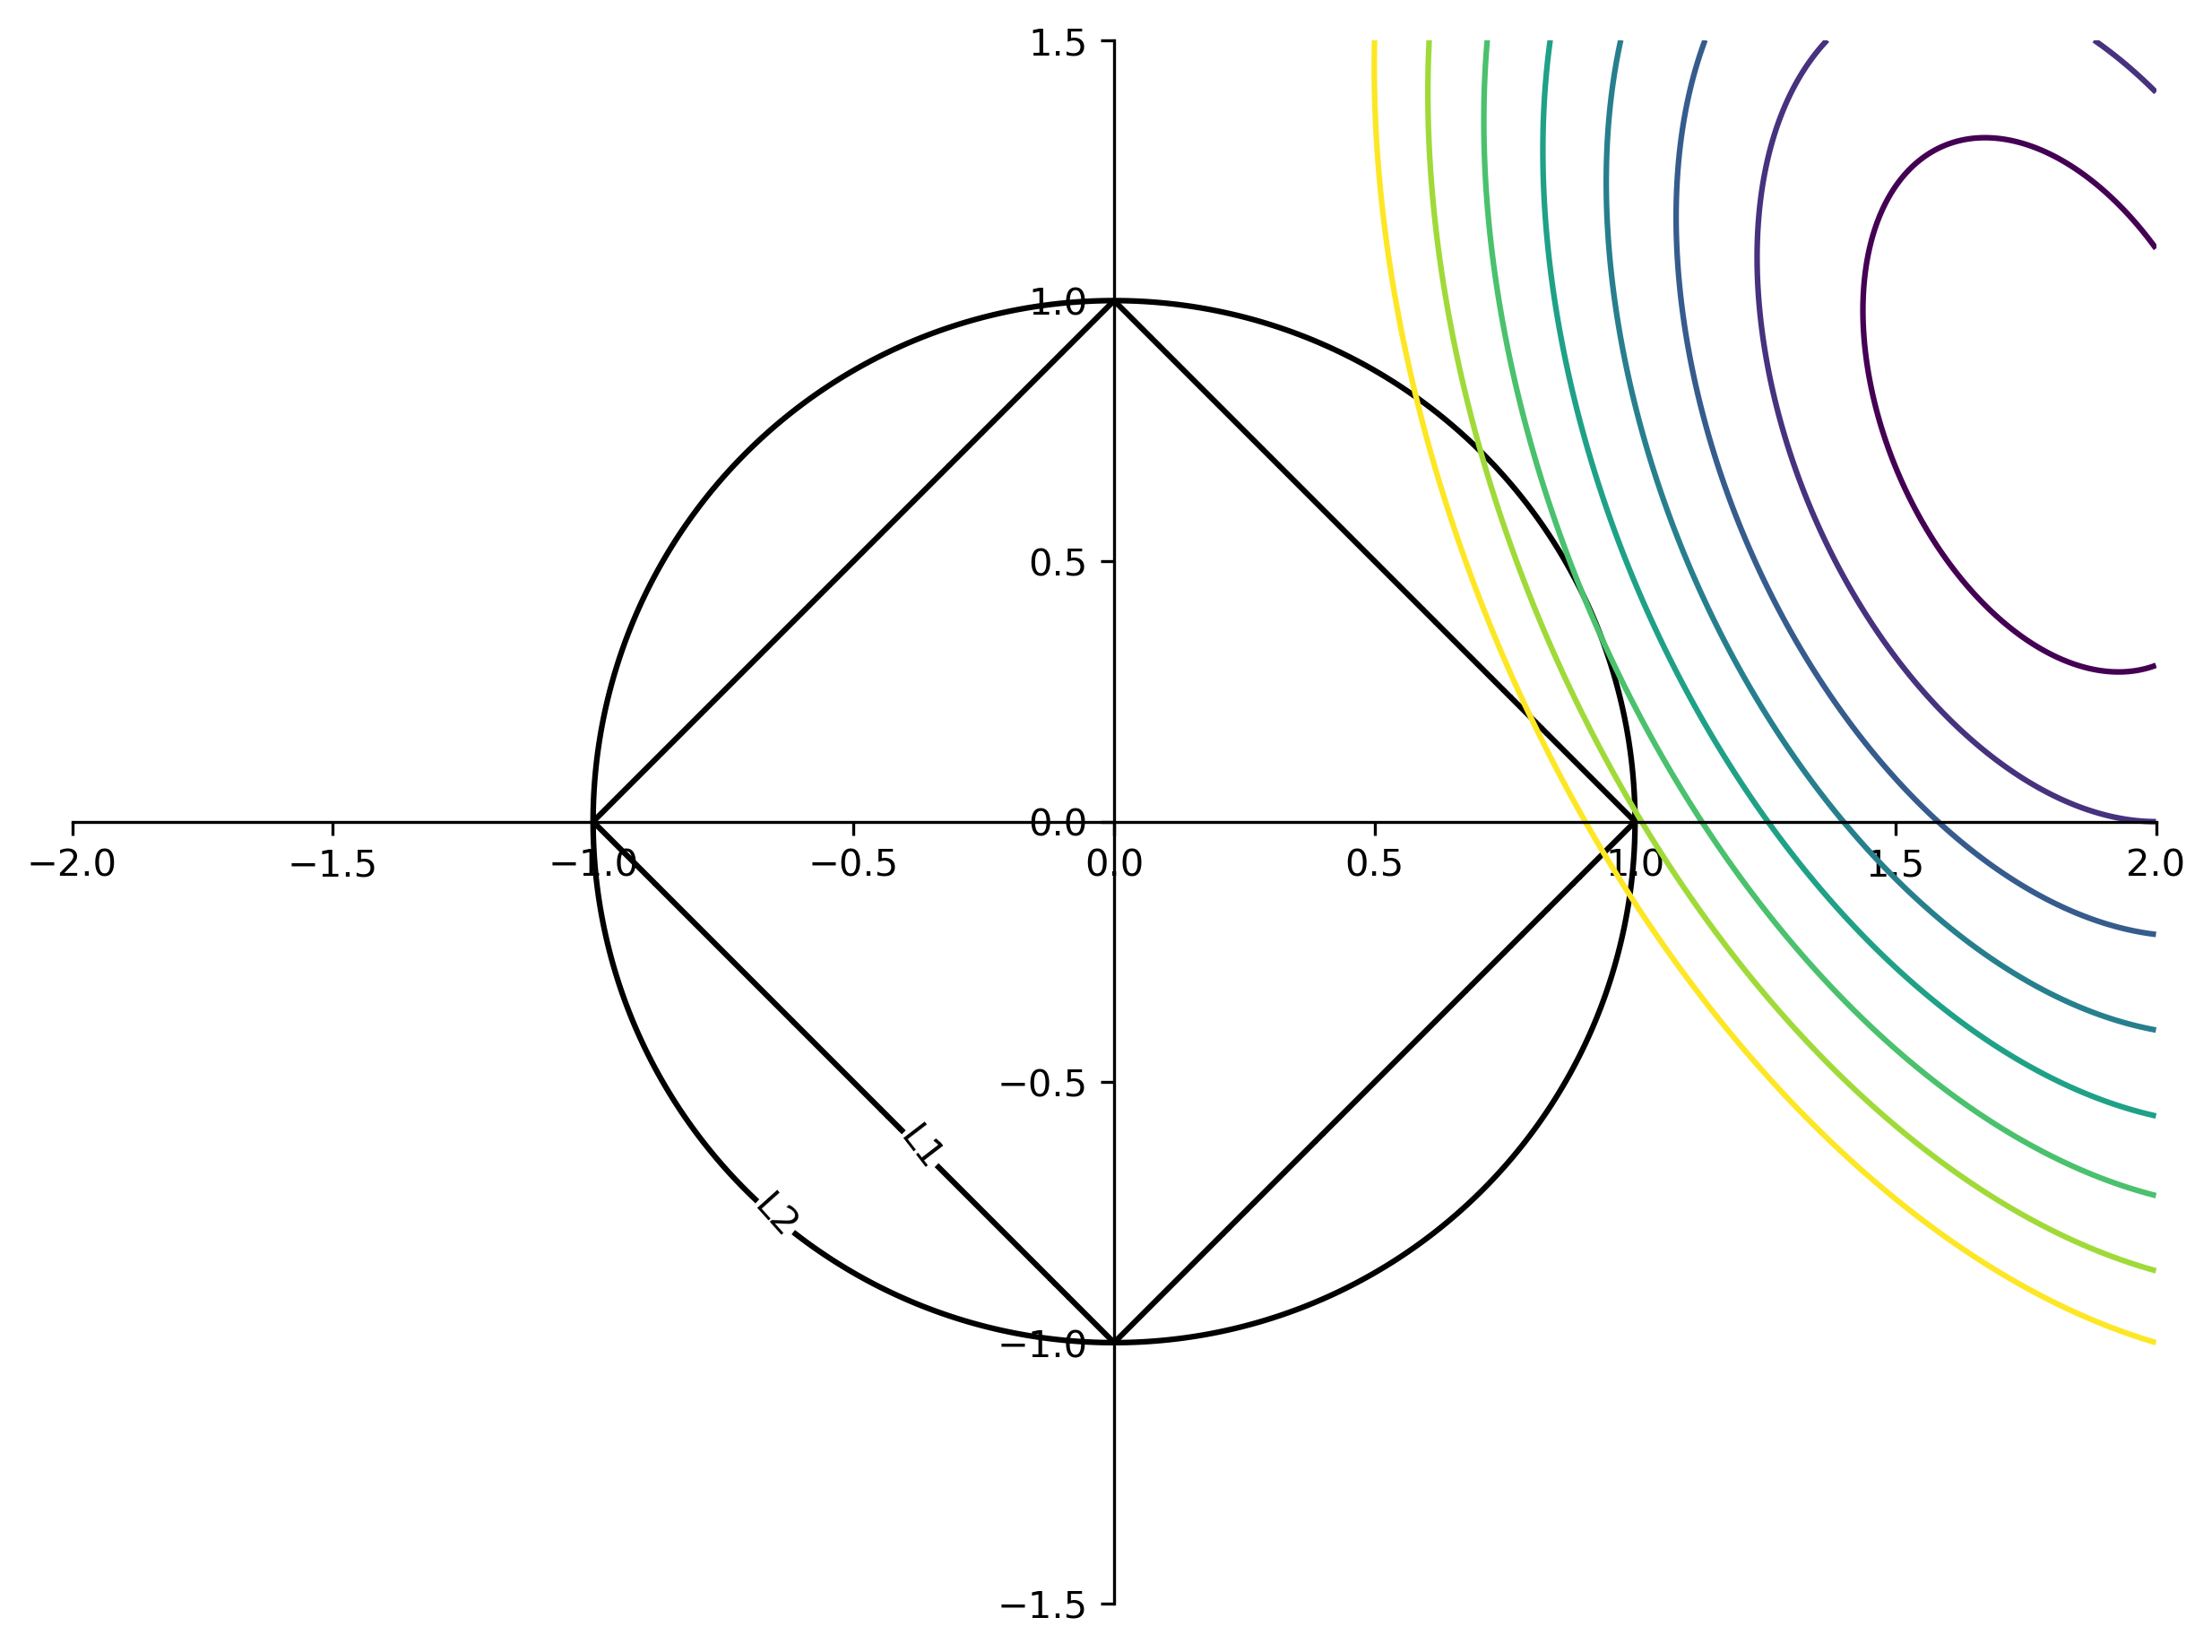

In [35]:
xline = np.linspace(-2., 2, 1001)
yline = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(xline, yline)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)

quadratic = np.sqrt(2 * (xx - 2.) ** 2 + (yy - 1.7) ** 2 + xx * yy)

plt.figure(figsize=(10, 10))
l2_contour = plt.contour(xx, yy, l2, levels=1, colors='k')
l1_contour = plt.contour(xx, yy, l1, levels=1, colors='k')
quadratic_contour = plt.contour(xx, yy, quadratic, levels=[1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3])

ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.clabel(l2_contour, inline=1, fontsize=10, fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=10, fmt={1.0: 'L1'}, manual=[(-1, -1)])

In [36]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])}


In [37]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([0.001  , 0.00178, 0.00316, 0.00562, 0.01   , 0.01778, 0.03162,
       0.05623, 0.1    , 0.17783, 0.31623, 0.56234, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

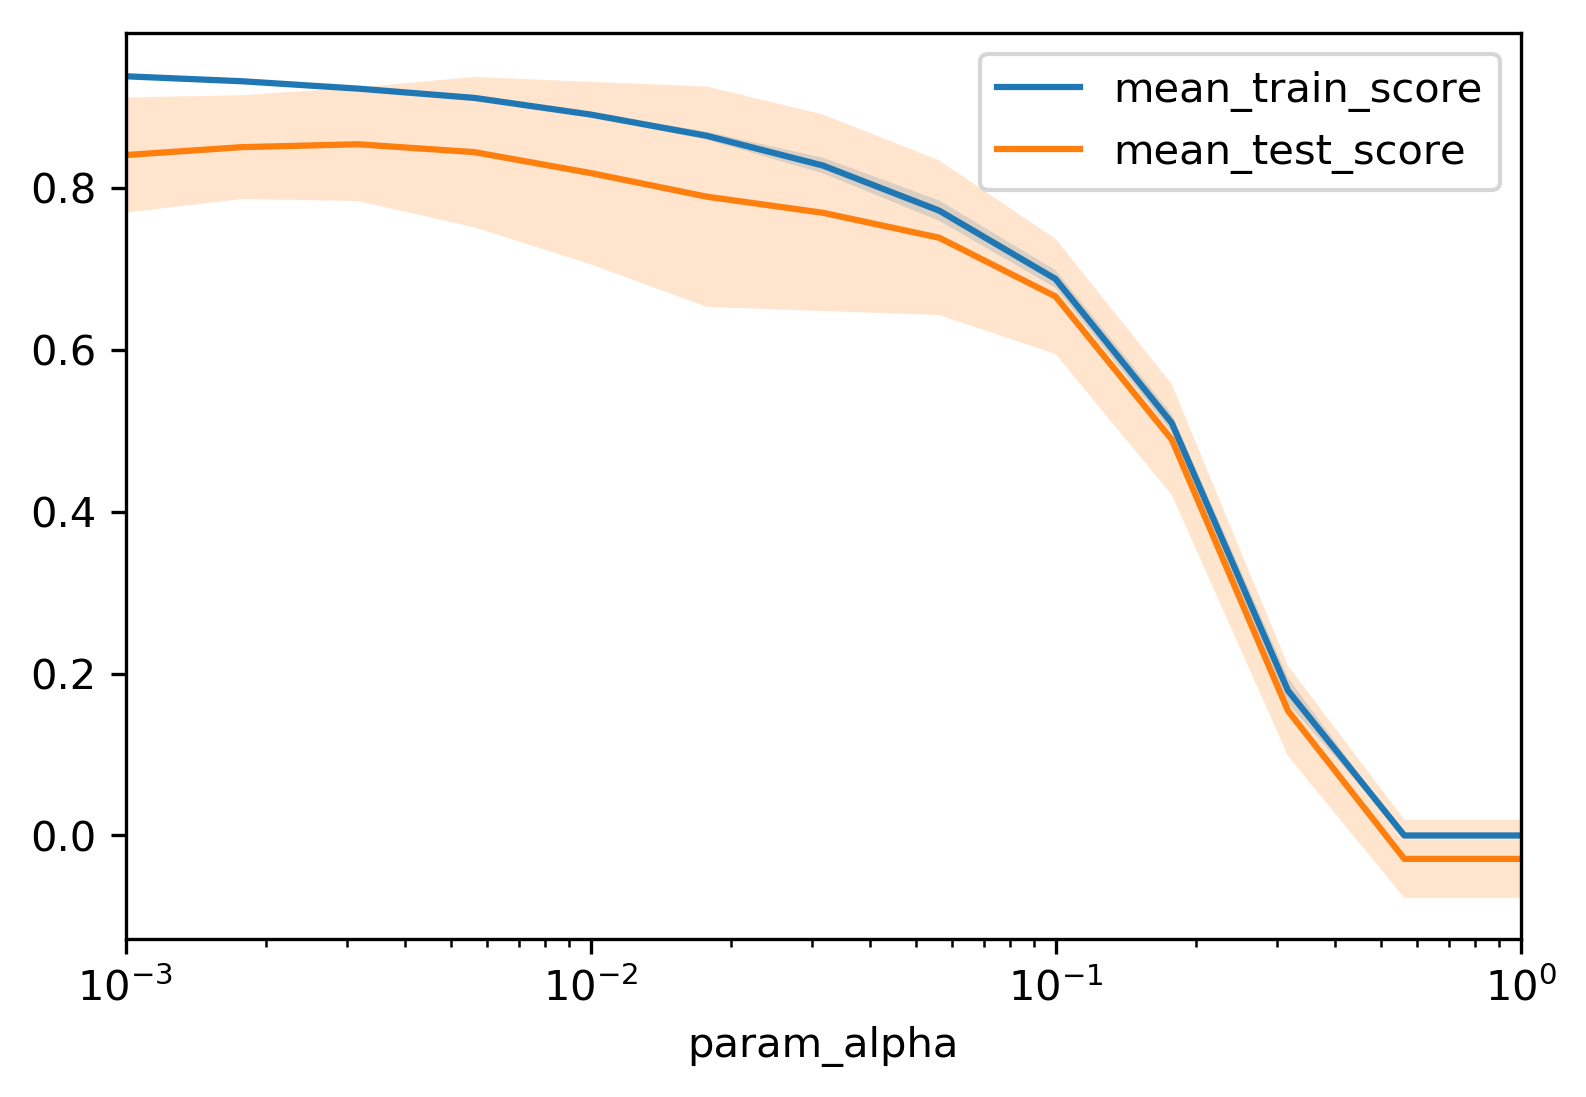

In [38]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
grid.score(X_test, y_test)